In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
pd.set_option('max_rows',200)
from pandas.tools.plotting import autocorrelation_plot
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
pd.set_option('max_columns',200)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
demand=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/historical_demand.csv')

In [4]:
sample=pd.read_csv('/Users/shashank/Downloads/av_or/sample_submission_BqRDhl5/demand_forecast.csv')

In [7]:
len(sample[sample.Month==37][sample.])

1458

In [4]:
d=demand[demand.Product_ID=='P14'][demand.Region=='R6']['Demand']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [5]:
d.index=pd.date_range(start='1/1/2014', end='31/12/2016', freq='MS')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


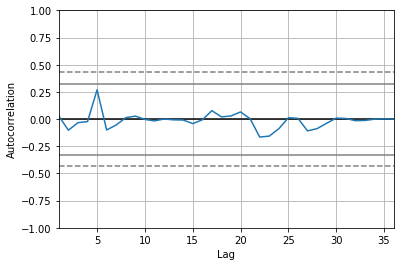

In [6]:
autocorrelation_plot(d,)

In [7]:
model = ARIMA(d, order=(4,1,0))
model_fit = model.fit(disp=-1)
# print(model_fit.summary())
# # plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())

In [8]:
demand

,Product_ID,Region,Month,Demand
0,P1,R1,1,0.00
1,P1,R1,2,0.00
2,P1,R1,3,0.00
3,P1,R1,4,0.00
4,P1,R1,5,0.00
5,P1,R1,6,0.00
6,P1,R1,7,0.00
7,P1,R1,8,0.00
8,P1,R1,9,0.00
9,P1,R1,10,0.00


In [8]:
result=pd.DataFrame(columns=['Product_ID','Region','Month','Demand'])


In [ ]:
## Arima 

In [9]:
p=[]
for i in demand.Product_ID.unique():
    for j in demand.Region.unique():
        df=demand[demand.Product_ID==i][demand.Region==j]
        df.index=pd.date_range(start='1/1/2014', end='31/12/2016', freq='MS')
        if df.Demand.sum()==0:
            p.append([i,j,37,0])
            p.append([i,j,38,0])
            p.append([i,j,39,0])
        else:    
#             print df.Demand
#             print i,j
            model = ARIMA(df.Demand, order=(4,1,0))
            model_fit = model.fit(disp=-1)
            preds=model_fit.forecast(steps=3)[0]
            p.append([i,j,37,preds[0]])
            p.append([i,j,38,preds[1]])
            p.append([i,j,39,preds[2]])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [11]:
res=pd.DataFrame(p,columns=['Product_ID','Region','Month','Demand'])

In [221]:
res

,Product_ID,Region,Month,Demand
0,P1,R1,37,0.000000
1,P1,R1,38,0.000000
2,P1,R1,39,0.000000
3,P1,R10,37,0.000000
4,P1,R10,38,0.000000
5,P1,R10,39,0.000000
6,P1,R11,37,0.000000
7,P1,R11,38,0.000000
8,P1,R11,39,0.000000
9,P1,R12,37,0.000000


In [30]:
p=res.Demand<0

In [41]:
res.loc[a,['Demand']]=0

In [36]:
a=p[p==True].index

In [42]:
res[res.Demand<0]

,Product_ID,Region,Month,Demand


In [44]:
one=res[res.Month==37]

In [45]:
one[one.Product_ID=='P1']['Demand'].sum()

0.0

In [46]:
oned=one.groupby(['Product_ID'])['Demand'].sum()

In [47]:
oned=oned.reset_index()

In [48]:
oned.to_excel('/Users/shashank/Desktop/oned.xlsx',index=False)

In [10]:
df=pd.read_excel('/Users/shashank/Desktop/oned.xlsx')

In [101]:
d=d.sort_values('Product ID')

In [102]:
d.to_excel('/Users/shashank/Desktop/modifiedML.xlsx',index=False)

In [4]:
fixed=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/fixed_cost.csv')
dprice=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/demand_price.csv')
pdcost=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/production_cost.csv')
pdcap=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/production_capacity.csv')
dcost=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/delivery_cost.csv')
chdays=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/changeover_days.csv')
chcost=pd.read_csv('/Users/shashank/Downloads/av_or/train_HO825Pf/changeover_cost.csv')
forecast=pd.read_csv('/Users/shashank/Downloads/av_or/sample_submission_BqRDhl5/demand_forecast.csv')

In [5]:
forecast

,Product_ID,Region,Month,Demand
0,P1,R1,37,0.000000
1,P1,R1,38,0.000000
2,P1,R1,39,0.000000
3,P1,R10,37,0.000000
4,P1,R10,38,0.000000
5,P1,R10,39,0.000000
6,P1,R11,37,0.000000
7,P1,R11,38,0.000000
8,P1,R11,39,0.000000
9,P1,R12,37,0.000000


In [265]:
p=res[res.Month==37]

In [234]:
k=p.groupby(['Product_ID','Region'])['Demand'].sum()

In [240]:
k

,Product_ID,Region,Demand
73,P13,R10,29.874033
74,P13,R11,19.946351
75,P13,R12,16.752676
81,P13,R18,7.547519
83,P13,R3,15.933170
86,P13,R6,238.117049
88,P13,R8,34.425456
104,P14,R6,224.815151
110,P15,R11,626.508348
127,P16,R10,11.409470


In [237]:
k=k.reset_index()

In [239]:
k=k[k.Demand!=0]

In [113]:
k.reset_index(drop=True,inplace=True)

In [241]:
k

,Product_ID,Region,Demand
73,P13,R10,29.874033
74,P13,R11,19.946351
75,P13,R12,16.752676
81,P13,R18,7.547519
83,P13,R3,15.933170
86,P13,R6,238.117049
88,P13,R8,34.425456
104,P14,R6,224.815151
110,P15,R11,626.508348
127,P16,R10,11.409470


In [242]:
dp=(dprice.groupby(['Product_ID','Region'])['Demand_price'].mean()).reset_index()

In [243]:
k1=k.merge(dp,on=['Product_ID','Region'])

In [244]:
k1=k1.rename(columns={'Product_ID':'Product'})

In [245]:
k2=k1.merge(pdcap,on=['Product'])

In [246]:
k2

,Product,Region,Demand,Demand_price,Plant,Line,Capacity
0,P13,R10,29.874033,1639.245650,A,1,125
1,P13,R10,29.874033,1639.245650,A,2,140
2,P13,R10,29.874033,1639.245650,B,1,0
3,P13,R10,29.874033,1639.245650,B,2,0
4,P13,R10,29.874033,1639.245650,B,3,0
5,P13,R10,29.874033,1639.245650,C,1,181
6,P13,R11,19.946351,1639.349139,A,1,125
7,P13,R11,19.946351,1639.349139,A,2,140
8,P13,R11,19.946351,1639.349139,B,1,0
9,P13,R11,19.946351,1639.349139,B,2,0


In [247]:
k3=k2.pivot_table('Capacity', ['Product', 'Region','Demand','Demand_price'], ['Plant','Line'])

In [252]:
k3.to_excel('/Users/shashank/Desktop/shit.xlsx')

In [251]:
k3.reset_index(inplace=True)

In [137]:
k3=k2.pivot_table('Capacity', ['Product', 'Region','Demand','Demand_price'], ['Plant','Line'])

In [140]:
k3.reset_index(inplace=True)

In [142]:
k3.columns

MultiIndex(levels=[[u'A', u'B', u'C', u'Demand_price', u'Demand', u'Region', u'Product'], [1, 2, 3, u'']],
           labels=[[6, 5, 4, 3, 0, 0, 1, 1, 1, 2], [3, 3, 3, 3, 0, 1, 0, 1, 2, 0]],
           names=[u'Plant', u'Line'])

In [159]:
k3.reset_index(inplace=True,drop=True)

In [161]:
k3.index

RangeIndex(start=0, stop=166, step=1)

In [255]:
gd['D_A_1']=pd.Series([1]*len(gd))

In [256]:
gd['D_A_2']=pd.Series([1]*len(gd))
gd['D_B_1']=pd.Series([1]*len(gd))
gd['D_B_2']=pd.Series([1]*len(gd))
gd['D_B_3']=pd.Series([1]*len(gd))
gd['D_C_1']=pd.Series([1]*len(gd))

In [253]:
gd=pd.read_excel('/Users/shashank/Downloads/shit-1.xlsx')

In [184]:
gd

,Product,Region,Demand,Demand_price,P_A1,P_A2,P_B1,P_B2,P_B3,P_C1,D_A_1,D_A_2,D_B_1,D_B_2,D_B_3,D_C_1
1,P13,R10,830.40,1639.245650,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
2,P13,R11,362.89,1639.349139,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
3,P13,R12,362.87,1763.575898,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
4,P13,R18,233.67,1911.349098,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
5,P13,R3,615.84,1874.250000,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
6,P13,R6,6422.56,1864.405246,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
7,P13,R8,1074.24,1593.444302,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0
8,P14,R6,9760.50,2218.324332,0.0,0.0,0.0,0.0,0.0,152.0,1.0,1.0,1.0,1.0,1.0,1.0
9,P15,R11,18956.30,1574.053472,0.0,0.0,205.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
10,P16,R10,321.13,1650.282440,125.0,0.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0


In [191]:
gd=gd.merge(A,on=['Product'])
gd=gd.merge(B,on=['Product'])
gd=gd.merge(C,on=['Product'])

In [194]:
gd=gd.rename(columns={
    'Production_cost_x':'Production_cost_A',
    'Production_cost_y':'Production_cost_B',
    'Production_cost':'Production_cost_C'
})

In [195]:
gd

,Product,Region,Demand,Demand_price,P_A1,P_A2,P_B1,P_B2,P_B3,P_C1,D_A_1,D_A_2,D_B_1,D_B_2,D_B_3,D_C_1,Production_cost_A,Production_cost_B,Production_cost_C
0,P13,R10,830.40,1639.245650,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
1,P13,R11,362.89,1639.349139,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
2,P13,R12,362.87,1763.575898,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
3,P13,R18,233.67,1911.349098,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
4,P13,R3,615.84,1874.250000,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
5,P13,R6,6422.56,1864.405246,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
6,P13,R8,1074.24,1593.444302,125.0,140.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1110.78,0.0,1074.97
7,P14,R6,9760.50,2218.324332,0.0,0.0,0.0,0.0,0.0,152.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,0.0,1036.65
8,P15,R11,18956.30,1574.053472,0.0,0.0,205.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,1149.0,0.00
9,P16,R10,321.13,1650.282440,125.0,0.0,0.0,0.0,0.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1702.13,0.0,1030.20


In [201]:
gd=gd.merge(A,on=['Region'])
gd=gd.merge(B,on=['Region'])
gd=gd.merge(C,on=['Region'])

In [203]:
gd=gd.rename(columns={
    'Delivery_cost_x':'Delivery_cost_A',
    'Delivery_cost_y':'Delivery_cost_B',
    'Delivery_cost':'Delivery_cost_C'
})

In [278]:
l.to_excel('/Users/shashank/Desktop/goodnewnew.xlsx',index=False)

In [208]:
l=pd.read_excel('/Users/shashank/Downloads/good.xlsx')

In [211]:
l.sort_values('Product',inplace=True)

In [223]:
len((demand.groupby(['Product_ID','Region'])['Demand'].sum()).reset_index())

1458

In [224]:
len(res)

4374

In [260]:
l.reset_index(drop=True,inplace=True)

In [267]:
p.drop(['Month'],axis=1,inplace=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [266]:
l.drop(['Demand'],axis=1,inplace=True)

In [272]:
p=p.rename(columns={'Product_ID':'Product'})

In [277]:
l=l.merge(p,on=['Product','Region'])

In [276]:
gd

,Product,Region,Demand,Demand_price,P_A1,P_A2,P_B1,P_B2,P_B3,P_C1,D_A_1,D_A_2,D_B_1,D_B_2,D_B_3,D_C_1
0,P13,R10,29.874033,1639.245650,125,140,0,0,0,181,1,1,1,1,1,1
1,P13,R11,19.946351,1639.349139,125,140,0,0,0,181,1,1,1,1,1,1
2,P13,R12,16.752676,1763.575898,125,140,0,0,0,181,1,1,1,1,1,1
3,P13,R18,7.547519,1911.349098,125,140,0,0,0,181,1,1,1,1,1,1
4,P13,R3,15.933170,1874.250000,125,140,0,0,0,181,1,1,1,1,1,1
5,P13,R6,238.117049,1864.405246,125,140,0,0,0,181,1,1,1,1,1,1
6,P13,R8,34.425456,1593.444302,125,140,0,0,0,181,1,1,1,1,1,1
7,P14,R6,224.815151,2218.324332,0,0,0,0,0,152,1,1,1,1,1,1
8,P15,R11,626.508348,1574.053472,0,0,205,0,0,0,1,1,1,1,1,1
9,P16,R10,11.409470,1650.282440,125,0,0,0,0,181,1,1,1,1,1,1


In [197]:
A=dcost[dcost.Plant=='A']
B=dcost[dcost.Plant=='B']
C=dcost[dcost.Plant=='C']

In [199]:
A.drop(['Plant'],axis=1,inplace=True)
B.drop(['Plant'],axis=1,inplace=True)
C.drop(['Plant'],axis=1,inplace=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [282]:
q=l.groupby(['Product'])['Demand'].sum()


In [285]:
q=q.reset_index()

In [286]:
q.to_excel('/Users/shashank/Desktop/aggd.xlsx',index=False)

In [287]:
f=pd.read_excel('/Users/shashank/Downloads/Final.xlsx')

In [292]:
f=f.iloc[:-2,:]

In [294]:
f

,Product,Region,Demand,Demand_price,P_A1,P_A2,P_B1,P_B2,P_B3,P_C1,D_A_1,D_A_2,D_B_1,D_B_2,D_B_3,D_C_1,Production_cost_A,Production_cost_B,Production_cost_C,Delivery_cost_A,Delivery_cost_B,Delivery_cost_C,Pdn_A,Pdn_B,Pdn_C,Total Pdn,Income,Days,Unnamed: 28,Pid,Agg. Demand,Total Pdn.1,Constr. Pdn,Unnamed: 33,total pdn,Constr Pdn
0,P13,R10,29.874033,1639.245650,125.0,140.0,0.0,0.0,0.0,181,0.000000,0.000000,0.000000,0.000000,0.000000,0.165050,1110.78,0.0,1074.97,112.327189,113.0,44.999574,0.000000,0.000000,29.874034,29.874034,1.551287e+04,0.165050,NaN,P13,3.625963e+02,362.596258,108.778876,NaN,22583.499991,NaN
1,P13,R6,238.117049,1864.405246,125.0,140.0,0.0,0.0,0.0,181,0.000000,1.700836,0.000000,0.000000,0.000000,0.000000,1110.78,0.0,1074.97,34.648618,59.0,277.030075,238.117054,0.000000,0.000000,238.117054,1.712006e+05,1.700836,NaN,P14,2.248152e+02,224.815151,67.444545,NaN,NaN,NaN
2,P13,R18,7.547519,1911.349098,125.0,140.0,0.0,0.0,0.0,181,0.000000,0.053911,0.000000,0.000000,0.000000,0.000000,1110.78,0.0,1074.97,107.862903,117.0,273.880474,7.547519,0.000000,0.000000,7.547519,5.228213e+03,0.053911,NaN,P15,6.265083e+02,626.508348,187.952504,NaN,NaN,NaN
3,P13,R8,34.425456,1593.444302,125.0,140.0,0.0,0.0,0.0,181,0.000000,0.245896,0.000000,0.000000,0.000000,0.000000,1110.78,0.0,1074.97,114.112903,242.0,170.235257,34.425455,0.000000,0.000000,34.425455,1.268755e+04,0.245896,NaN,P16,1.777027e+02,177.702657,53.310797,NaN,NaN,NaN
4,P13,R12,16.752676,1763.575898,125.0,140.0,0.0,0.0,0.0,181,0.000000,0.119662,0.000000,0.000000,0.000000,0.000000,1110.78,0.0,1074.97,34.648618,54.0,200.000000,16.752676,0.000000,0.000000,16.752676,1.035562e+04,0.119662,NaN,P17,4.034476e+01,40.344759,12.103428,NaN,NaN,NaN
5,P13,R11,19.946351,1639.349139,125.0,140.0,0.0,0.0,0.0,181,0.000000,0.142474,0.000000,0.000000,0.000000,0.000000,1110.78,0.0,1074.97,148.041475,233.0,213.722138,19.946350,0.000000,0.000000,19.946350,7.590138e+03,0.142474,NaN,P19,1.752225e+02,101.963185,52.566756,NaN,NaN,NaN
6,P13,R3,15.933170,1874.250000,125.0,140.0,0.0,0.0,0.0,181,0.023943,0.092430,0.000000,0.000000,0.000000,0.000000,1110.78,0.0,1074.97,34.648618,90.0,277.030075,15.933170,0.000000,0.000000,15.933170,1.161243e+04,0.116374,NaN,P22,9.923648e+02,992.364759,297.709428,NaN,NaN,NaN
7,P14,R6,224.815151,2218.324332,0.0,0.0,0.0,0.0,0.0,152,0.000000,0.000000,0.000000,0.000000,0.000000,1.479047,0.00,0.0,1036.65,34.648618,59.0,277.030075,0.000000,0.000000,224.815144,224.815144,2.033777e+05,1.479047,NaN,P23,1.392283e+03,1392.282678,417.684802,NaN,NaN,NaN
8,P15,R11,626.508348,1574.053472,0.0,0.0,205.0,0.0,0.0,0,0.000000,0.000000,3.056138,0.000000,0.000000,0.000000,0.00,1149.0,0.00,148.041475,233.0,213.722138,0.000000,626.508352,0.000000,626.508352,1.203231e+05,3.056138,NaN,P24,2.902022e+02,290.202220,87.060666,NaN,NaN,NaN
9,P16,R4,11.706775,2205.000000,125.0,0.0,0.0,0.0,0.0,181,0.000000,0.000000,0.000000,0.000000,0.000000,0.064678,1702.13,0.0,1030.20,32.059332,41.0,200.000000,0.000000,0.000000,11.706775,11.706775,1.141176e+04,0.064678,NaN,P25,6.379447e+01,63.794474,19.138342,NaN,NaN,NaN


In [ ]:
f['D_A_1']=pd.Series(np.floor(f.D_A_1))
f['D_A_2']=pd.Series(np.ceil(f.D_A_2))
f['D_B_1']=pd.Series(np.ceil(f.D_B_1))
f['D_B_2']=pd.Series(np.ceil(f.D_B_2))
f['D_B_3']=pd.Series(np.ceil(f.D_B_3))
f['D_C_1']=pd.Series(np.ceil(f.D_C_1))

In [304]:
np.sum(np.floor(f.D_C_1))

17.0

In [289]:
f['Total Pdn.1']==f['Agg. Demand']

0      False
1       True
2       True
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31      True
32     False
33     False
34     False
35      True
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [43]:
res.to_csv('/Users/shashank/Downloads/av_or/sample_submission_BqRDhl5/res.csv',index=False)

In [135]:
l=res[res.Demand<0].index

In [137]:
res.iloc[l,3]=0

In [138]:
res[res.Demand<0]

,Product_ID,Region,Month,Demand


In [143]:
sample['Demand']=res.Demand

In [144]:
sample.to_csv('/Users/shashank/Downloads/av_or/sample_submission_BqRDhl5/demand_forecast.csv',index=False)

In [5]:
demand

,Product_ID,Region,Month,Demand
0,P1,R1,1,0.00
1,P1,R1,2,0.00
2,P1,R1,3,0.00
3,P1,R1,4,0.00
4,P1,R1,5,0.00
5,P1,R1,6,0.00
6,P1,R1,7,0.00
7,P1,R1,8,0.00
8,P1,R1,9,0.00
9,P1,R1,10,0.00


In [12]:
df[df.Product_ID=='P17']

,Product_ID,Demand
8,P17,40.344759
